# Predicting the IMDb rating of movies in the 21st century

__Import general modules start__

In [1]:
import pandas as pd
import numpy as np

__Import data start__

I sort the data due to chosen restrictions on how I define movies. If one of the actors or the directors name is missing, then the observation is dropped, since these features have a major impact and cannot be estimated using interpolation.
Furthermore only movies in the 21st century are chosen, with movies having a budget and grossing above 100.000 USD, movies being from the US and being at least 80 minutes long (which defines a movie). These restrictions are made to make movies comparable.

In [2]:
df = pd.read_csv("/Users/Rasmus/Documents/AU/Udenlandsophold/PKU/Machine Learning for Finance/Exam/Project/IMDb/movie_metadata.csv")
df.columns = ['color', 'director_name', 'num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name', 'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name', 'movie_title', 'num_voted_users', 'cast_total_facebook_likes', 'actor_3_name', 'facenumber_in_poster', 'plot_keywords', 'movie_imdb_link', 'num_user_for_reviews', 'language', 'country', 'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio', 'movie_facebook_likes']
df = df.dropna(subset=['title_year']) # Drops since it does not make sense to take mean of the years for the other movies.
df = df.dropna(subset=['director_name'])
df = df.dropna(subset=['actor_1_name'])
df = df.dropna(subset=['actor_2_name'])
df = df.dropna(subset=['actor_3_name'])
df = df.dropna(subset=['movie_title'])
df = df.dropna(subset=['aspect_ratio'])
df = df[~(df['title_year'] <= 1999)]
df = df[~(df['budget'] <= 100000)]
df = df[~(df['gross'] <= 100000)]
df = df[~(df['color'] != 'Color')]
df = df[~(df['country'] != 'USA')]
df = df[~(df['duration'] <= 80)]

#df.imdb_score = np.around((round(df['imdb_score']))) # Parten IMDb scores into groups by 1 rating intervals
#df.imdb_score = df.imdb_score.astype('int')
df = df[~(df['imdb_score'] <= 3)]
df = df[~(df['imdb_score'] >= 9)]
# Correcting for outliers and not enough observations.

__Data description start__

In [3]:
import matplotlib.pyplot as plt
font = {'fontname':'Arial', 'size':'14'}
title_font = { 'weight' : 'bold','size':'16'}
plt.hist(df.imdb_score, bins=100)
plt.axvline(df.imdb_score.mean(), color='k', linestyle='dashed', linewidth=1)
plt.title("Distribution of the IMDb ratings")
plt.savefig('distribution_imdb_score_done.png', dpi=300)
plt.show() # Shows distribution of IMDb scores
mu = np.mean(df.imdb_score)
std = np.std(df.imdb_score)
print('Number of observations =', len(df.imdb_score))
print('μ =', "{0:.2f}".format(round(mu,2)), ', σ =', "{0:.2f}".format(round(std,2)))
df.tail()

<Figure size 640x480 with 1 Axes>

Number of observations = 2227
μ = 6.29 , σ = 0.99


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
4993,Color,William Eubank,161.0,97.0,18.0,236.0,Olivia Cooke,852.0,NaN,Sci-Fi|Thriller,...,180.0,English,USA,PG-13,4000000.0,2014.0,680.0,6.1,2.35,10000
5010,Color,Andrew Bujalski,43.0,85.0,26.0,3.0,Kate Dollenmayer,26.0,NaN,Comedy|Drama,...,61.0,English,USA,NaN,NaN,2002.0,6.0,6.4,1.37,108
5012,Color,David Ayer,233.0,109.0,453.0,120.0,Martin Donovan,1000.0,10499968.0,Action|Crime|Drama|Thriller,...,212.0,English,USA,R,35000000.0,2014.0,206.0,5.7,1.85,10000
5019,Color,Marcus Nispel,43.0,91.0,158.0,265.0,Brittany Curran,630.0,NaN,Horror|Mystery|Thriller,...,33.0,English,USA,R,NaN,2015.0,512.0,4.6,1.85,0
5031,Color,Thomas L. Phillips,13.0,82.0,120.0,84.0,Joe Coffey,785.0,NaN,Comedy|Horror|Thriller,...,8.0,English,USA,NaN,200000.0,2012.0,98.0,5.4,16.00,424


__Partitioning a dataset into a seperate training and test set start__

In [4]:
X, y = df.iloc[:, [2,3,4,5,7,12,13,15,18,22,23,24,27]].values, df.iloc[:, 25].values
#X.columns = ['num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_1_facebook_likes', 'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster', 'num_user_for_reviews', 'budget', 'title_year', 'actor_2_facebook_likes', 'movie_facebook_likes']
# 8 is gross, 25 is imdb_score, 23 is title_year
# Listing features start
df.isna().sum() # Displays NaN values per feature
#Obtain mean of columns as you need, nanmean is just convenient.
col_mean = np.nanmean(X, axis=0)

#Find indicies that you need to replace
inds = np.where(np.isnan(X))

#Place column means in the indices. Align the arrays using take
X[inds] = np.take(col_mean, inds[1])
# Listing features end

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)
y=y.astype('int')
y_train=y_train.astype('int') 
y_test=y_test.astype('int')

from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_train_std = X_train_std.astype('int')
X_test_std = stdsc.transform(X_test)
X_test_std = X_test_std.astype('int')

__Numeric features : imputation and scaling start__

In [6]:

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)


In [7]:
numeric_features=df._get_numeric_data().columns.values.tolist()
text_features=df.columns.values.tolist()
text_features=[i for i in text_features if i not in numeric_features]
string_features=["movie_title", "plot_keywords"]
categorical_features=[i for i in text_features if i not in string_features]
numeric_features.remove("title_year") 
categorical_features.append("title_year")
### Title_year is categorical
### all the others can be considered continuous 
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler 
## we use standard scaler to keep as much variance as possible (compared to minmax)
imp=Imputer(missing_values='NaN',strategy="most_frequent", axis=0)
df[numeric_features]=imp.fit_transform(df[numeric_features])

scl=StandardScaler()
df[numeric_features]=scl.fit_transform(df[numeric_features])
pd.set_option('max_columns',15)
df[numeric_features].head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,4.067141,3.780888,-0.239969,-0.036356,-0.426027,9.434499,5.528678,-0.376799,-0.659250,6.893642,4.071582,-0.278803,1.618232,-0.503317,0.860551
1,0.863772,3.296309,-0.043887,0.028226,1.727316,3.381316,2.593887,1.586689,-0.659250,2.291609,5.402769,0.502388,0.812170,0.241554,-0.470696
3,4.751946,3.027099,7.422205,9.826934,1.009535,5.242840,7.354209,4.222166,-0.659250,5.999084,4.346271,3.962388,2.222779,0.241554,6.145201
5,2.081204,1.304153,-0.074535,-0.181110,-0.445904,0.209874,0.762111,-0.510403,-0.219816,1.024529,4.635751,-0.337238,0.308381,0.241554,0.497484
6,1.548577,2.596363,-0.239969,1.364413,0.843893,3.745312,1.970386,1.483136,-0.659250,3.974291,4.515311,1.655721,-0.094650,0.241554,-0.470696


__Testing perceptron to get baseline for estimates to improve upon start__

In [8]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(max_iter=400, eta0=0.1, random_state=16)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      max_iter=400, n_iter=None, n_jobs=1, penalty=None, random_state=16,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [9]:
y_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 345


In [10]:
from sklearn.metrics import accuracy_score

print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.38


In [11]:
print('Accuracy: %.2f' % ppn.score(X_test_std, y_test))

Accuracy: 0.38


__Correlation of the numeric features with the IMDB score start__

In [12]:
import operator
from scipy.stats import pearsonr
correl={}
for f in numeric_features:
    correl[f]=pearsonr(df[f], df.imdb_score)
sorted_cor = sorted(correl.items(), key=operator.itemgetter(1), reverse=True)
print (sorted_cor)

[('imdb_score', (1.0, 0.0)), ('num_voted_users', (0.5138419710319546, 2.4910628319419037e-150)), ('num_critic_for_reviews', (0.46161634874811247, 6.02663282741769e-118)), ('duration', (0.3987832183436967, 8.828594040536948e-86)), ('num_user_for_reviews', (0.3582827193165639, 1.968615672743182e-68)), ('movie_facebook_likes', (0.34037233361455393, 1.5962459115906572e-61)), ('gross', (0.26918938044706897, 2.829795534258081e-38)), ('director_facebook_likes', (0.19881673585207454, 2.7500992180208385e-21)), ('budget', (0.16024741645259793, 2.800633412735834e-14)), ('cast_total_facebook_likes', (0.149809882724836, 1.1957648566077103e-12)), ('actor_2_facebook_likes', (0.13422740607520575, 2.023049179634092e-10)), ('actor_1_facebook_likes', (0.12911092520822381, 9.651101268469614e-10)), ('actor_3_facebook_likes', (0.09740783280994107, 4.121555693545143e-06)), ('aspect_ratio', (-0.03532514184138586, 0.09559067927707245)), ('facenumber_in_poster', (-0.08842296093413707, 2.9328209921044538e-05))]


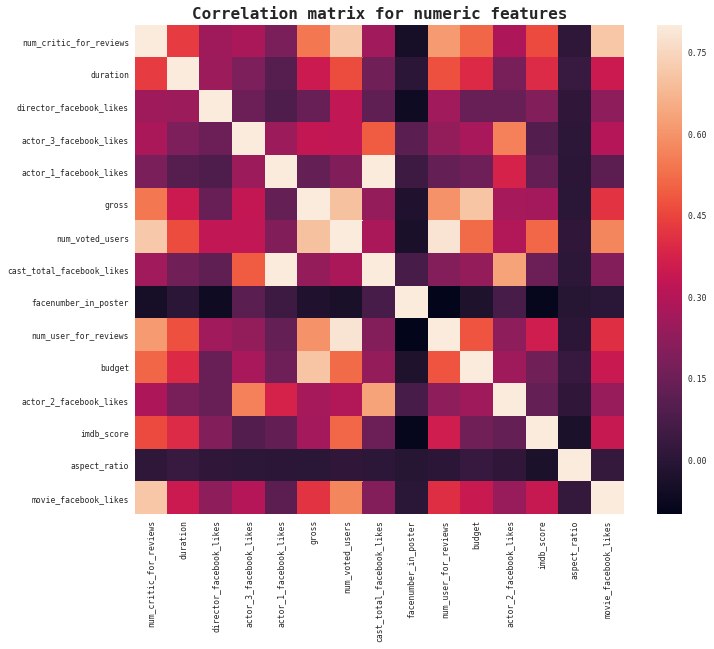

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
def corrmap(features, title):
    sns.set(context="paper", font="monospace")
    corrmat = df[features].corr()
    f, ax = plt.subplots(figsize=(12, 9))
    plt.title(title, **title_font)
# Draw the heatmap using seaborn
    sns.heatmap(corrmat, vmax=.8, square=True)
corrmap(numeric_features,"Correlation matrix for numeric features")
plt.savefig('correlation_map.png', dpi=700)

__L1-regularization start__

Training accuracy: 0.5047904191616767
Test accuracy: 0.473967684021544


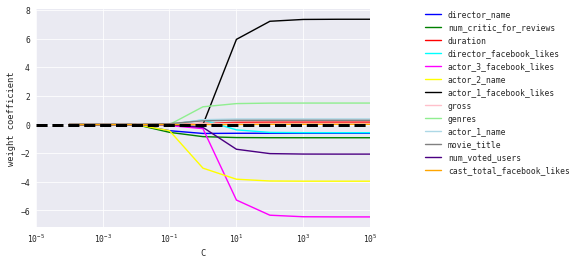

In [14]:
from sklearn.linear_model import LogisticRegression
LogisticRegression(penalty='l1')

lr = LogisticRegression(penalty='l1', C=1.0)
# Note that C=1.0 is the default. You can increase
# or decrease it to make the regulariztion effect
# stronger or weaker, respectively.
# I use X_train_std[:, k3] instead of X_train_std based on the argumentation above.
lr.fit(X_train_std, y_train)
print('Training accuracy:', lr.score(X_train_std, y_train))
print('Test accuracy:', lr.score(X_test_std, y_test))

lr.intercept_
np.set_printoptions(8)
lr.coef_[lr.coef_!=0].shape
lr.coef_

import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111)
    
colors = ['blue', 'green', 'red', 'cyan', 
          'magenta', 'yellow', 'black', 
          'pink', 'lightgreen', 'lightblue', 
          'gray', 'indigo', 'orange']

weights, params = [], []
for c in np.arange(-4., 6.):
    lr = LogisticRegression(penalty='l1', C=10.**c, random_state=16)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)

weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label=df.columns[column + 1],
             color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', 
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)
plt.savefig('Weights_L1.png', dpi=300, bbox_inches='tight', pad_inches=0.2)
plt.show()

__Assessing feature importance with Random Forests start__

 1) actor_2_name                   0.129690
 2) director_name                  0.096114
 3) num_critic_for_reviews         0.092185
 4) genres                         0.090795
 5) actor_1_name                   0.089304
 6) actor_1_facebook_likes         0.072572
 7) director_facebook_likes        0.072188
 8) duration                       0.070663
 9) num_voted_users                0.066787
10) actor_3_facebook_likes         0.063624
11) cast_total_facebook_likes      0.061252
12) movie_title                    0.057945
13) gross                          0.036881


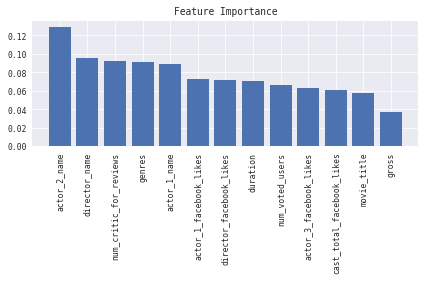

Number of features that meet this threshold criterion: 5
 1) actor_2_name                   0.129690
 2) director_name                  0.096114
 3) num_critic_for_reviews         0.092185
 4) genres                         0.090795
 5) actor_1_name                   0.089304


In [15]:
from sklearn.ensemble import RandomForestClassifier

feat_labels = df.columns[1:]

forest = RandomForestClassifier(n_estimators=500, random_state=16)

forest.fit(X_train, y_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.savefig('Feature_importance_RF.png', dpi=300)
plt.show()

from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(forest, threshold=0.08, prefit=True)
X_selected = sfm.transform(X_train)
print('Number of features that meet this threshold criterion:', X_selected.shape[1])
for f in range(X_selected.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

From the model above I can conclude that the names of the actors and the director, as well as the genre and number of critics are the most important features of a movie.
__Assessing feature importance with Random Forests end__

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

pipe_lr = make_pipeline(StandardScaler(), PCA(n_components=10), LogisticRegression(random_state=16))

pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))

Test Accuracy: 0.449


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log = LogisticRegression(penalty='l2',C=1)
log.fit(X_train,y_train)

accuracy_score(y_test,log.predict(X_test))

0.4578096947935368

__SBS setup start__

The following feature selection method is based on Sequeltial Backwards Selection:

In [18]:
from sklearn.base import clone
from itertools import combinations
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score, test_size=0.25, random_state=16):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=self.test_size,random_state=self.random_state)

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train, X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]

        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

SBS class is now defined. It is used below.

__SBS implementation in action using the KNN classifier from scikit-learn start__

Below I use the SBS to select features.

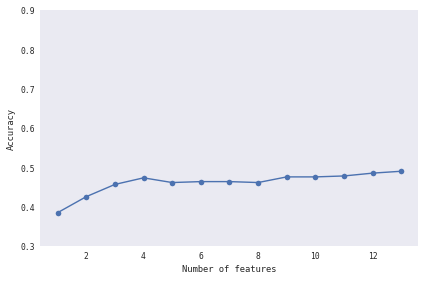

In [19]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10)

# selecting features
SBS = SBS(knn, k_features=1)
SBS.fit(X_train_std, y_train)

# plotting performance of feature subsets
k_feat = [len(k) for k in SBS.subsets_]

plt.plot(k_feat, SBS.scores_, marker='o')
plt.ylim([0.3, 0.9])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.savefig('SBS_implemented.png', dpi=300)
plt.show()

Accuracy reaches a steady level after 4 features. Hence adding extra features does not help our model.

In [20]:
k3 = list(SBS.subsets_[10])
print(df.columns[1:][k3])

Index(['num_critic_for_reviews', 'actor_2_name', 'actor_1_name'], dtype='object')


In [21]:
knn.fit(X_train_std, y_train)
print('Training accuracy:', knn.score(X_train_std, y_train))
print('Test accuracy:', knn.score(X_test_std, y_test))

Training accuracy: 0.5760479041916168
Test accuracy: 0.4398563734290844


In [22]:
knn.fit(X_train_std[:, k3], y_train)
print('Training accuracy:', knn.score(X_train_std[:, k3], y_train))
print('Test accuracy:', knn.score(X_test_std[:, k3], y_test))

Training accuracy: 0.5682634730538922
Test accuracy: 0.4614003590664273


From the figure above we see that using the subset of four features does not increase accuracy. The real gain using this subset is that the dataset has been reduces significantly, which then requires less computational power. Henceforth X_train_std[:, k3] is used instead of X_train_std.

## Models

In [23]:
knn=KNeighborsClassifier(n_neighbors=100)
knn.fit(X_train,y_train)

accuracy_score(y_test,knn.predict(X_test))

0.39138240574506283

In [24]:
from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion ="gini",random_state=16)
clf_gini.fit(X_train,y_train)

y_predict = clf_gini.predict(X_test)
y_predict

print("Gini accuracy =",accuracy_score(y_test,y_predict))

Gini accuracy = 0.45960502692998206


In [25]:
clf_entropy = DecisionTreeClassifier(criterion ="entropy",random_state=16)
clf_entropy.fit(X_train,y_train)

y_predict_entropy = clf_entropy.predict(X_test)

print("Entropy accuracy =",accuracy_score(y_test,y_predict_entropy))

Entropy accuracy = 0.42908438061041293


__Total and explained variance start__

In [26]:
import numpy as np
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

print('\nEigenvalues \n%s' % eigen_vals)


Eigenvalues 
[4.39176151e+00 2.05975686e+00 1.39480259e+00 1.68349882e-03
 1.72229433e-01 2.06907179e-01 9.69809490e-01 8.90122246e-01
 8.50068034e-01 3.54512334e-01 4.61942920e-01 6.54309445e-01
 5.99883558e-01]


In [27]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

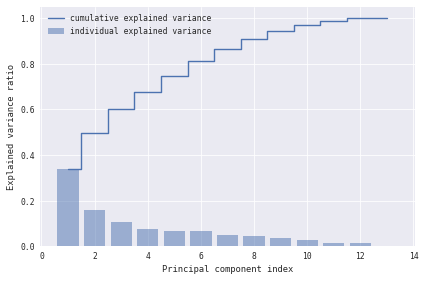

In [28]:
import matplotlib.pyplot as plt

plt.bar(range(1, 14), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1, 14), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('Explained_variance_PCA.png', dpi=300)
plt.show()

__Pipelines start__

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

pipe_lr = make_pipeline(StandardScaler(), PCA(n_components=13),LogisticRegression(random_state=16))

pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))

Test Accuracy: 0.479


from sklearn.linear_model import LogisticRegression
LogisticRegression(penalty='l1')
lr = LogisticRegression(penalty='l1', C=1, random_state=16)
lr.fit(X_train_std, y_train)
print('Training accuracy:', lr.score(X_train_std, y_train))
print('Test accuracy:', lr.score(X_test_std, y_test))
lr.intercept_
lr.coef_

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

pipe_svc = make_pipeline(StandardScaler(), SVC(random_state=16))

param_range = [0.1, 1, 10, 20]

param_grid = [{'svc__C': param_range,'svc__kernel': ['linear']},{'svc__C': param_range, 'svc__gamma': param_range, 'svc__kernel': ['rbf']}]

gs = GridSearchCV(estimator=pipe_svc, param_grid=param_grid,scoring='accuracy', cv=5, n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

__Diagnosing bias and variance problems with learning curves start__

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

pipe_lr = make_pipeline(StandardScaler(), LogisticRegression(penalty='l2', random_state=16))

train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_lr, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')

plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')

plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.35, 0.70])
plt.tight_layout()
plt.savefig('Learning_curves.png', dpi=300)
plt.show()

Based on the learning curves above, the number of training samples reach a stable level at around 900, hence accuracy does not increase significantly afterwards.

__Addressing over- and underfitting with validation curves start__

In [ ]:
from sklearn.model_selection import validation_curve


param_range = [0.001, 0.01, 0.1, 1, 10, 50]
train_scores, test_scores = validation_curve(estimator=pipe_lr, X=X_train, y=y_train, param_name='logisticregression__C', param_range=param_range, cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')

plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(param_range, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')

plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.35, 0.6])
plt.tight_layout()
plt.savefig('Validation_curves.png', dpi=300)
plt.show()

Based on the validation curves above, a good value is 1 for parameter C to reach a stable accuracy. Increasing C to e.g. 10 and 100 does not increase the accuracy significantly. 
__Addressing over- and underfitting with validation curves end__

__SVC cross-validation start__

I use cross-validation in order to ensure stability of the model by randomly splitting the training into k folds without replacements. k-1 folds is used for training and the last fold is used for measuring accuracy. This is done 10 times to obtain 10 estimates to ensure stability.

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=pipe_svc,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)
print('CV accuracy scores: %s' % scores)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

__Regression based estimates start__

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
cols = ['imdb_score', 'budget', 'num_user_for_reviews', 'num_voted_users', 'gross']

#sns.pairplot(df, size=2.5) # Removing the square in front of this shows the entire set of pair-wise correlations.
sns.pairplot(df[cols], size=2.5)
plt.tight_layout()
plt.savefig('Pairplots', dpi=300)
plt.show()

In [ ]:
import numpy as np
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=cols, xticklabels=cols)
plt.savefig('PairplotsHeatmap', dpi=300)
plt.show()

__Decision tree regression start__

In [ ]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)    
    return 

In [ ]:
from sklearn.tree import DecisionTreeRegressor

X = df[['budget']].values
y = df['gross'].values

tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X, y)

sort_idx = X.flatten().argsort()

lin_regplot(X[sort_idx], y[sort_idx], tree)
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.savefig('DecisionTreeRegressor.png', dpi=300)
plt.show()